# Pakistan COVID19 Prediction
## Data From [Kaggle covid19 global forcasting week3](https://www.kaggle.com/c/covid19-global-forecasting-week-3)

In [1]:
# IMPORTS
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [2]:
%%time
# LOAD TRAIN DATA
train = pd.read_csv('train-04Mar2020.csv')

Wall time: 25 ms


In [3]:
df = train[train['Country_Region']=='Pakistan']
Pakistan_data = df.copy()
Pakistan_data= Pakistan_data[Pakistan_data.ConfirmedCases > 0.0]
Pakistan_data.reset_index(inplace=True)
Pakistan_data.drop(columns= ['index','Id','Province_State'],inplace=True)
Pakistan_data['ConfirmedCases'] = Pakistan_data['ConfirmedCases'].astype(int) 
Pakistan_data['Fatalities'] = Pakistan_data['Fatalities'].astype(int) 
Pakistan_data.head()

,Country_Region,Date,ConfirmedCases,Fatalities
0,Pakistan,2020-02-26,2,0
1,Pakistan,2020-02-27,2,0
2,Pakistan,2020-02-28,2,0
3,Pakistan,2020-02-29,4,0
4,Pakistan,2020-03-01,4,0


In [4]:
month_day_list = []
for date in Pakistan_data['Date']:
    month_day_list.append(date.split('2020-0')[1])

Pakistan_data['Month_Day'] = month_day_list
Pakistan_data.head()

,Country_Region,Date,ConfirmedCases,Fatalities,Month_Day
0,Pakistan,2020-02-26,2,0,2-26
1,Pakistan,2020-02-27,2,0,2-27
2,Pakistan,2020-02-28,2,0,2-28
3,Pakistan,2020-02-29,4,0,2-29
4,Pakistan,2020-03-01,4,0,3-01


In [5]:
def Calculate_Table ( X_train ):
    # CALCULATE EXPANSION TABLE
    diff_conf, conf_old = [], 0 
    diff_fat, fat_old = [], 0
    dd_conf, dc_old = [], 0
    dd_fat, df_old = [], 0
    ratios = []
    for row in X_train.values:
        diff_conf.append(row[2]-conf_old)
        conf_old = row[2]
        diff_fat.append(row[3]-fat_old)
        fat_old = row[3]
        dd_conf.append(diff_conf[-1]-dc_old)
        dc_old = diff_conf[-1]
        dd_fat.append(diff_fat[-1]-df_old)
        df_old = diff_fat[-1]
        ratios.append(fat_old / conf_old)
        ratio = fat_old / conf_old
        

    return diff_conf, conf_old, diff_fat, fat_old, dd_conf, dc_old, dd_fat, df_old, ratios, ratio

In [6]:
def populate_df_features(X_train,diff_conf, diff_fat, dd_conf, dd_fat, ratios):    
    # POPULATE DATAFRAME FEATURES
    pd.options.mode.chained_assignment = None  # default='warn'
    X_train['diff_confirmed'] = diff_conf
    X_train['diff_fatalities'] = diff_fat
    X_train['dd_confirmed'] = dd_conf
    X_train['dd_fatalities'] = dd_fat
    X_train['ratios'] = ratios
    return X_train

In [7]:
def fill_nan ( variable):
    if math.isnan(variable):
        return 0
    else:
        return variable

In [8]:
def Cal_Series_Avg(X_train,ratio):
    # CALCULATE SERIES AVERAGES
    d_c = fill_nan( X_train.diff_confirmed[X_train.diff_confirmed != 0].mean() )
    dd_c = fill_nan( X_train.dd_confirmed[X_train.dd_confirmed != 0].mean() )
    d_f = fill_nan( X_train.diff_fatalities[X_train.diff_fatalities != 0].mean() )
    dd_f = fill_nan( X_train.dd_fatalities[X_train.dd_fatalities != 0].mean() )
    rate = fill_nan( X_train.ratios[X_train.ratios != 0].mean() )
    print("rate: %.2f ratio: %.2f" %(rate,ratio))
    print("d_c: %.2f, dd_c: %.2f, d_f: %.2f, dd_f: %.2f "%(d_c, dd_c, d_f, dd_f))
    rate = max(rate,ratio)
    return d_c, dd_c, d_f, dd_f, rate

In [9]:
def apply_taylor(train, d_c, dd_c, d_f, dd_f, rate):
    # ITERATE TAYLOR SERIES
    
    pred_c, pred_f = [],[]
    for i in range(1, 34):
        pred_c.append(int( ( train.ConfirmedCases[len(train)-1] + d_c*i + 0.5*dd_c*(i**2)) ) )
        pred_f.append(pred_c[-1]*rate )
    return pred_c, pred_f

In [10]:

diff_conf, conf_old, diff_fat, fat_old, dd_conf, dc_old, dd_fat, df_old, ratios, ratio = Calculate_Table(Pakistan_data)

Pakistan_data = populate_df_features(Pakistan_data,diff_conf, diff_fat, dd_conf, dd_fat, ratios)

d_c, dd_c, d_f, dd_f, rate = Cal_Series_Avg(Pakistan_data, ratio)

pc, pf = apply_taylor(Pakistan_data, d_c, dd_c, d_f, dd_f, rate)

rate: 0.01 ratio: 0.01
d_c: 93.93, dd_c: 3.88, d_f: 2.56, dd_f: 0.07 


In [11]:
len(pc), len(pf)

(33, 33)

In [12]:
Pakistan_data.iloc[:,:]

,Country_Region,Date,ConfirmedCases,Fatalities,Month_Day,diff_confirmed,diff_fatalities,dd_confirmed,dd_fatalities,ratios
0,Pakistan,2020-02-26,2,0,2-26,2,0,2,0,0.000000
1,Pakistan,2020-02-27,2,0,2-27,0,0,-2,0,0.000000
2,Pakistan,2020-02-28,2,0,2-28,0,0,0,0,0.000000
3,Pakistan,2020-02-29,4,0,2-29,2,0,2,0,0.000000
4,Pakistan,2020-03-01,4,0,3-01,0,0,-2,0,0.000000
5,Pakistan,2020-03-02,4,0,3-02,0,0,0,0,0.000000
6,Pakistan,2020-03-03,5,0,3-03,1,0,1,0,0.000000
7,Pakistan,2020-03-04,5,0,3-04,0,0,-1,0,0.000000
8,Pakistan,2020-03-05,5,0,3-05,0,0,0,0,0.000000
9,Pakistan,2020-03-06,6,0,3-06,1,0,1,0,0.000000


In [13]:
Pakistan_data.shape

(39, 10)

In [14]:
dates = pd.read_csv('test (1).csv')
dates.drop(columns= ['ForecastId','Province_State','Country_Region'],inplace=True)
dates = dates.iloc[10:43,:]

pd_list = []
for date in dates.Date:
    pd_list.append(date.split('2020-0')[1])

Date_list = list(Pakistan_data.Month_Day.copy())
Date_list.extend(pd_list)
#Date_list

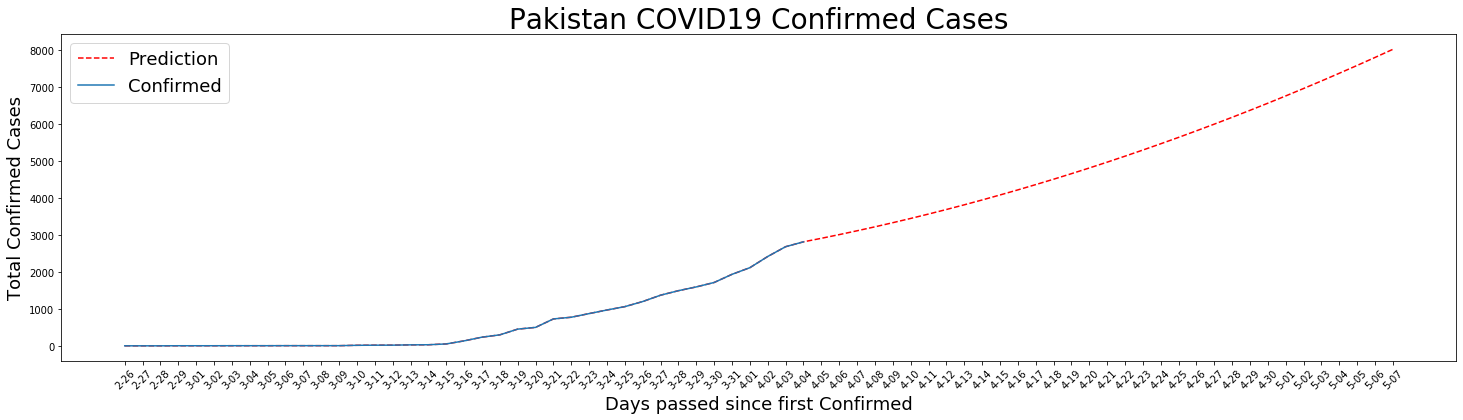

In [15]:
plt.figure(figsize=(25,6))

tpc = list(Pakistan_data.ConfirmedCases.copy())
tpc.extend(pc)
plt.plot(Date_list,tpc,'r',linestyle='dashed',label='Prediction')
plt.plot(Pakistan_data.ConfirmedCases,label='Confirmed')
plt.xlabel("Days passed since first Confirmed",fontdict={'fontsize': 18})
plt.ylabel("Total Confirmed Cases",fontdict={'fontsize': 18})
plt.legend(fontsize= 18)
plt.title('Pakistan COVID19 Confirmed Cases',fontdict={'fontsize': 28})
plt.xticks(rotation = 45)
#plt.yscale('log')
#plt.xscale('log')
plt.show()


In [16]:
# AR example
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [17]:
data = Pakistan_data.ConfirmedCases

# fit model
model = AR(Pakistan_data.ConfirmedCases)
model_fit = model.fit()

# make prediction
start = len(Pakistan_data.ConfirmedCases)
yhat = model_fit.predict(start,71)
pcc= list(data[0:start])

pcc.extend(list(yhat))
print(len(pcc))

72


D:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


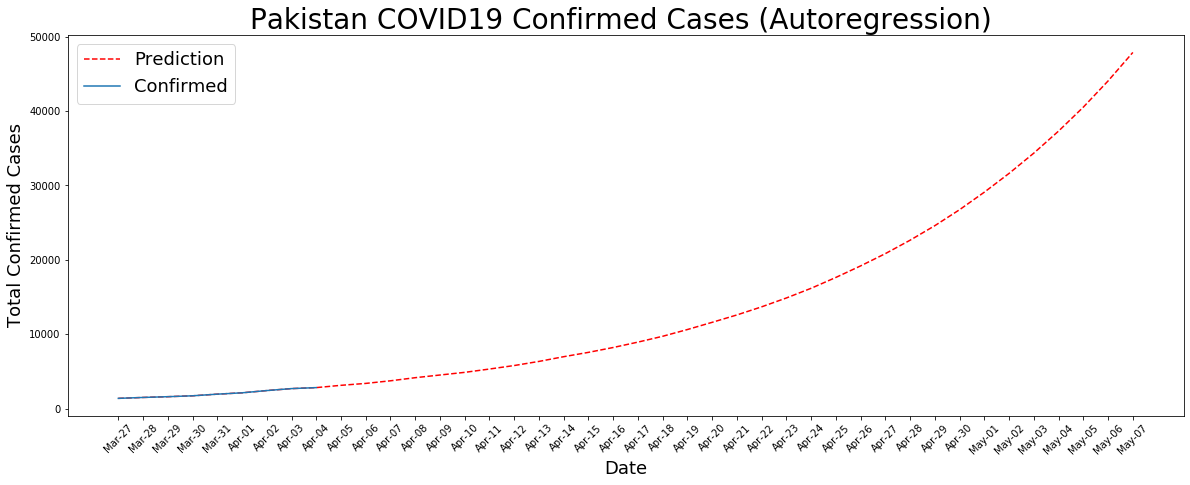

In [18]:
pcc2 = pcc[30:]
dl = Date_list[30:]
for i,d in enumerate(dl):
    dl[i] = d.replace("3-","Mar-")
    dl[i] = dl[i].replace("4-","Apr-")
    dl[i] = dl[i].replace("5-","May-")
cc = Pakistan_data.ConfirmedCases[30:]
plt.figure(figsize=(20,7))
plt.plot(dl,pcc2,'r',linestyle='dashed',label='Prediction')
plt.plot(dl[:9],cc,label='Confirmed')
plt.xlabel("Date",fontdict={'fontsize': 18})
plt.ylabel("Total Confirmed Cases",fontdict={'fontsize': 18})
plt.legend(fontsize= 18)
plt.title('Pakistan COVID19 Confirmed Cases (Autoregression) ',fontdict={'fontsize': 28})
plt.xticks(rotation=45)
plt.show()

In [19]:
models = SARIMAX(Pakistan_data.ConfirmedCases, order=(1, 0, 0), trend='t')
models_fit = models.fit()
# make prediction
start = len(Pakistan_data.ConfirmedCases)
yhats = models_fit.predict(start,71)
pccs= list(data[0:start])
pccs.extend(list(yhats))


D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


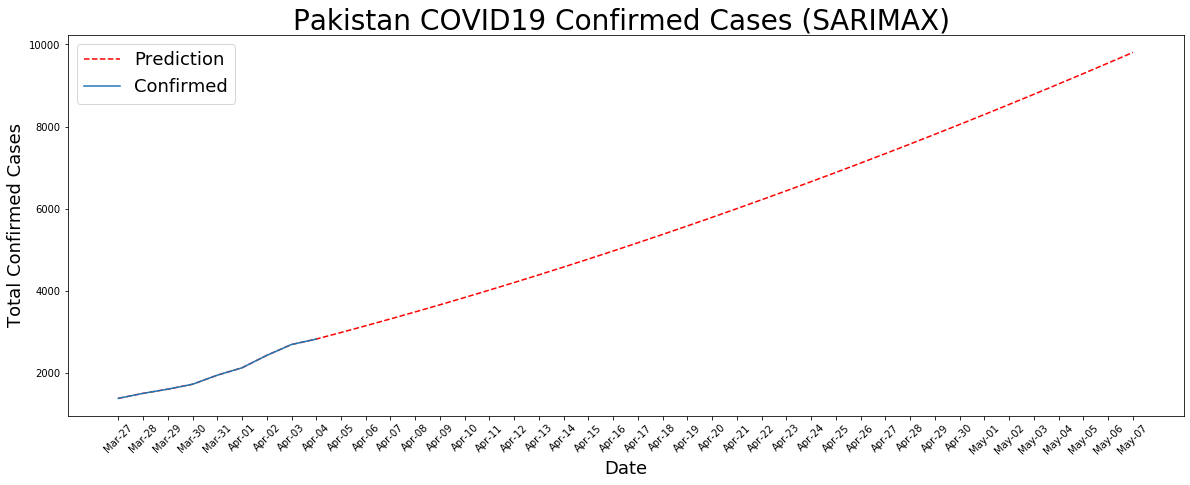

In [20]:
pccs2 = pccs[30:]
dls = Date_list[30:]
for i,d in enumerate(dls):
    dls[i] = d.replace("3-","Mar-")
    dls[i] = dls[i].replace("4-","Apr-")
    dls[i] = dls[i].replace("5-","May-")
ccs = Pakistan_data.ConfirmedCases[30:]
plt.figure(figsize=(20,7))
plt.plot(dls,pccs2,'r',linestyle='dashed',label='Prediction')
plt.plot(dls[:9],ccs,label='Confirmed')
plt.xlabel("Date",fontdict={'fontsize': 18})
plt.ylabel("Total Confirmed Cases",fontdict={'fontsize': 18})
plt.legend(fontsize= 18)
plt.title('Pakistan COVID19 Confirmed Cases (SARIMAX) ',fontdict={'fontsize': 28})
plt.xticks(rotation=45)
plt.show()

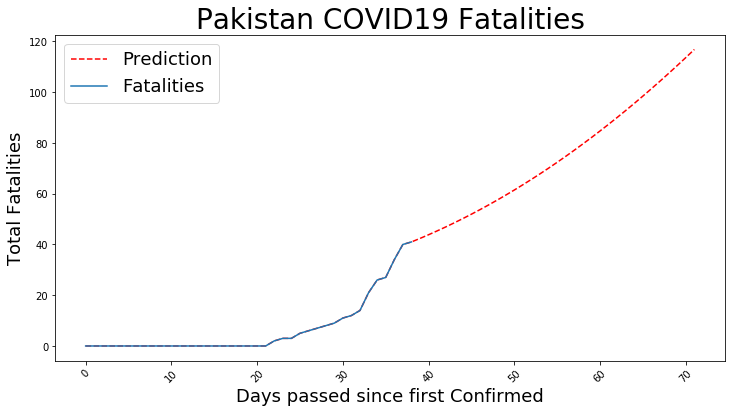

In [21]:
plt.figure(figsize=(12,6))

tpf = list(Pakistan_data.Fatalities.copy())
tpf.extend(pf)
plt.plot(tpf,'r',linestyle='dashed',label='Prediction')
plt.plot(Pakistan_data.Fatalities,label='Fatalities')
plt.xlabel("Days passed since first Confirmed",fontdict={'fontsize': 18})
plt.ylabel("Total Fatalities",fontdict={'fontsize': 18})
plt.legend(fontsize= 18)
plt.title('Pakistan COVID19 Fatalities',fontdict={'fontsize': 28})
plt.xticks(rotation=45)
plt.show()


In [22]:
data = Pakistan_data.Fatalities
data_len = len(data)
to_predict = range(data_len+1, data_len+30)
# fit model
model = AR(Pakistan_data.Fatalities)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start,71)
pfc= list(data[0:start])
pfc.extend(list(yhat))
#print(pfc)

D:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


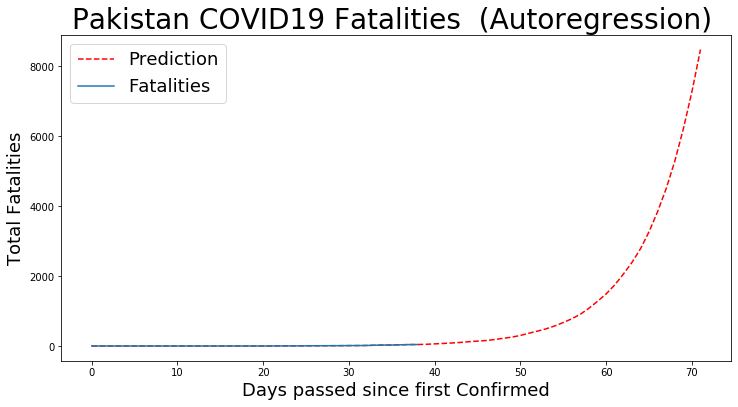

In [23]:
plt.figure(figsize=(12,6))

plt.plot(pfc,'r',linestyle='dashed',label='Prediction')
plt.plot(Pakistan_data.Fatalities,label='Fatalities')
plt.xlabel("Days passed since first Confirmed",fontdict={'fontsize': 18})
plt.ylabel("Total Fatalities",fontdict={'fontsize': 18})
plt.legend(fontsize= 18)
plt.title('Pakistan COVID19 Fatalities  (Autoregression) ',fontdict={'fontsize': 28})
#plt.yscale('log')
#plt.xscale('log')
plt.show()